# Imports

In [1]:
# Importing required modules
import warnings
import cv2
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
from random import *
from tqdm import tqdm
from astropy.io import fits
warnings.filterwarnings('ignore')

# EDA

### Class count

In [2]:
counts = {}
data = pd.read_csv('lens_finding/SpaceBasedTraining/classifications.csv')
data.head()

,ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma
0,100000,1,8.633760e-10,171,195.429
1,100001,1,1.317890e-10,294,855.589
2,100002,1,4.877250e-12,140,486.113
3,100003,1,1.440160e-09,1500,10467.400
4,100004,0,2.197350e-11,0,0.000


In [3]:
counts = data['is_lens'].value_counts()
counts = dict(counts)
counts

{1: 12574, 0: 5426}

In [4]:
len(data['numb_pix_lensed_image'].value_counts())

2045

In [5]:
len(data['flux_lensed_image_in_sigma'].value_counts())

12214

<Axes: >

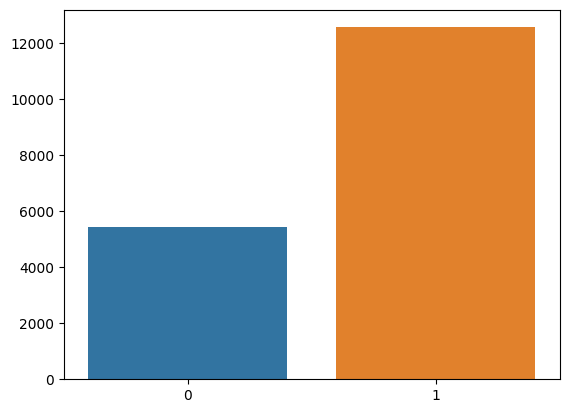

In [6]:
sns.barplot(x = list(counts.keys()), y = list(counts.values()))

The classes are highly imbalanced.

### Unique sizes

In [7]:
sizes = []
for i in tqdm(os.listdir('lens_finding/SpaceBasedTraining/files')):
    # print(i)
    hdulist = fits.open(f'lens_finding/SpaceBasedTraining/files/{i}')
    data = hdulist[0].data
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    data = np.uint8(data * 255)
    data = cv2.cvtColor(data, cv2.COLOR_GRAY2BGR)
    sizes.append(str(data.shape))
sizes = pd.Series(sizes)
print(sizes.value_counts())

100%|██████████| 18000/18000 [00:29<00:00, 614.96it/s]

(101, 101, 3)    18000
dtype: int64


Therefore, all the images are of (101x101) dimension with a single channel.

In [8]:

x = [randint(0, 18000-1) for i in range(10)] 
print(x)

[2708, 2280, 11113, 6899, 7990, 4200, 837, 2036, 2639, 13803]


In [9]:
cnt = 0
data = pd.read_csv('lens_finding/SpaceBasedTraining/classifications.csv')
for i in x:
    hdulist = fits.open(f"lens_finding/SpaceBasedTraining/files/imageEUC_VIS-{int(data.iloc[i]['ID'])}.fits")
    data1 = hdulist[0].data
    data1 = (data1 - np.min(data1)) / (np.max(data1) - np.min(data1))
    data1 = np.uint8(data1 * 255)
    data1 = cv2.cvtColor(data1, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(f'data_fit/{i}_{data.iloc[i]["is_lens"]}.jpg', data1)

In [10]:
os.listdir('.')

['lens_finding',
 'eda.ipynb',
 'wandb',
 'checkpoint_235.pth.tar',
 'checkpoint_237.pth.tar',
 'test-deeplenses.ipynb',
 'train-notebook.ipynb',
 'data_fit']